In [1]:
# (tf1) 가상머신에서 jupyter 실행할 것
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

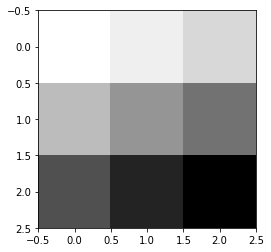

In [3]:
# 3*3*1*1 이미지 준비 

# 2*2*1 필터 준비
image = np.array([[[[1], [2], [3]],
                 [[4], [5], [6]],
                 [[7], [8], [9]]]], dtype=np.float32)


image.shape

# 이미지를 2차원크기로 보내야 한다.
# 근데 이미지는 4차원이니까 reshape으로 줄여야함
plt.imshow(image.reshape(3,3), cmap="Greys")



In [4]:
# 패딩없이  Convolution layer 추출

filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

In [5]:
filter.shape

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

(1, 2, 2, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]


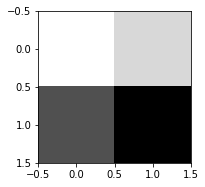

In [9]:
# Tensorflow에 conv2d   : convolution layer를 추출해주는 함수

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="VALID")  
# 가로 세로 한칸씩 이동이라는 뜻
# [1,1,1,1] 에서 첫번째 네번째 1은 의미없는 자리이다 그냥 자리 채우기용

# [1,2,2,1] 이라고 하면  가로 세로로 두칸씩 이동이라는 것

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

In [ ]:
## padding을 이용한 convolution layer 추출
filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="SAME")  
# padding을 SAME을 하면 같은 모양을 그대로 유지할 수 있게 한다. 


sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

(1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


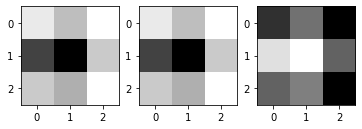

In [11]:
## 3개의 필터 사용해보기   (2*2*1*3)
## 그러면 세개의 이미지가 생성된다.


filter = tf.constant([[[[1., 10, -1]],[[1., 10, -1]]],
                      [[[1., 10, -1]],[[1., 10, -1]]]])


conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="SAME")  
# padding을 SAME을 하면 같은 모양을 그대로 유지할 수 있게 한다. 


sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    
    #이미지가 세장이 나올것이니까 1행3열로 바꿔준다.
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

    필터로 만들어진 이미지 순서대로 이다.
    패딩을 했기 때문에 사이즈가 같아짐 

In [13]:
#### Max pooling (2*2)
image2 = tf.constant([[[[4],[3]],
                     [[2], [1]]]])

# 2*2 의 커널이 만들어짐?
pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1], padding="VALID")  

# 세션

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)


sess.close()


(1, 1, 1, 1)
[[[[4]]]]


### CNN 실습예제_MNIST

    https://docs.google.com/presentation/d/1h90rpyWiVlwkuCtMgTLfAVKIiqJrFunnKR7dqPNtI6I/edit#slide=id.g1ee4a504dd_0_0

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


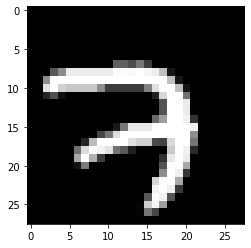

In [3]:
img = mnist.train.images[0]
img.shape # (784,)

plt.imshow(img.reshape(28, 28), cmap="gray") # 2차원으로만 들어가니까 1차원 (784,) → 2차원 28*28

X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

#### 첫번째 Convolution Layer 준비

    Convolution1 ->  ReLU1  ->  Max pool1  

In [4]:
# 1차원 MNIST 데이터 4차원으로 Reshape
## tf.reshape(X, [이미지갯수, 가로, 세로, 색])
## 이미지갯수 -1 = None
X_img = tf.reshape(X, [-1, 28, 28, 1]) # 이미지갯수 미지정의 가로 28, 세로 28, 흑백(1) 이미지로 Reshpae


# 필터(크기 3*3 / 갯수 32개 / 색상 수 1) 준비
#    * 필터사이즈 & 스트라이드 사이즈는 조절해가면서 성능 조절~~~~~
# Convolution layer는 가중치로 뽑는거니까
# W = tf.Variable(tf.random_normal(가로, 세로, 색상, 갯수), stddev=이게머라구?)로 준비하긔
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

In [5]:
# Convolution Layer
## L1 = tf.nn.conv2d(이미지데이터, 필터, strides=[디퐅트1, 가로1, 세로1, 디폴트1], padding="SAME")
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)

L1 = tf.nn.relu(L1)
print(L1)

# Convolution Layer으로 뽑은 이미지에서 Max Pooling Layer
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


    최초 컨볼루션할 때 모양은 28* 28이다.
    
    그것을 Max pool로 뽑아 내었을 때 크기는 14*14가 된다.
    
    원래는 더 작아졌을 텐데 padding = same을 해서 14*14의 크기가 된것

#### 두번째 Convolution Layer

In [6]:
# 필터(크기 3*3 / 갯수 64개 / 색상 수 1) 준비
# W = tf.Variable(tf.random_normal(가로, 세로, 색상, 갯수), stddev=범위)로 준비하긔
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
# 아니 3번째꺼 색상이라면서요 근데 왜 갖고온 갯수가 32개니까 3번째에 32개 넣는다고 하시는데요;;;;;
# 아 처음 받을때는 색상 수인데 두번째에서는 이전꺼 갯수로 받는다고요
# 왜 그러는건데...?

In [7]:
# Convolution Layer
## L1 = tf.nn.conv2d(첫번째 Convolution layer, 2번째필터, strides=[디퐅트1, 가로1, 세로1, 디폴트1], padding="SAME")
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)

L2 = tf.nn.relu(L2)
print(L2)

# Convolution Layer으로 뽑은 이미지에서 Max Pooling Layer
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L2)


Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


    패딩이 SAME이지만 strides = [1, 1]에서 [2, 2]로 올라서 
    
    14*14에서 7*7로 크기가 줄어든 것이다. 
    

#### Fully Connected Layer 작성

    FC
    
    

In [8]:
# 하이퍼파라미터 준비
learning_rate = 0.001
training_epochs = 30
batch_size = 500

In [9]:
########## Tensor graph 작성

# 입력데이터 준비 (L를 4차원에서 2차원으로) / 정답(y)는 위에서 작업해놨구요
L2 = tf.reshape(L2, [-1, 7*7*64])

# 가설준비
W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

### 비용 함수 ###
logit = tf.matmul(L2, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

### 최소비용 계산 ###
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

########## Tensor graph 실행

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_xy = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_xy})
        avg_cost += c/total_batch
    
#     print("Epoch :", "%04d"%(epoch+1), "cost :", "{:.9f}".format(avg_cost))
        


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



KeyboardInterrupt: 

In [14]:
# 정확도 확인
correct_pred = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))
sess.close()

정확도 :  0.9855




### CNN 실습예제_교통표지판


    http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
    GTSRB_Final_Test_Images.zip
    GTSRB_Final_Training_Images.zip 다운로드
    
#### Image format
    Images are stored in PPM format (Portable Pixmap, P6)

    Image sizes vary between 15x15 to 250x250 pixels

       

### 이미지전처리 준비
    
    Convolution Layer1 → Max Pooling → Convolution Layer2 →Max Pooling →FC(Fully Connected)

In [10]:
import glob # 동시에 여러 폴더(or)파일을 불러오기 위한 패키지
from skimage.color import rgb2lab # RGB를 간단한 색상으로 바꿔주는 패키지
from skimage.transform import resize # 이미지 사이즈 변경해주는 패키지
from collections import namedtuple # 뭐욤?

np.random.seed(101)

In [11]:
# 절대 변하면 안되는 상수 값들을 전부 고정값으로 표시해두기(ex. 표지판클래스 개수 43개)
N_CLASS = 43
RESIZED_IMAGE = (32, 32)

Dataset = namedtuple("Dataset", ["X", "y"])

In [12]:
#데이터 불러오기 & 전처리
# X데이터 차원 조정하는 함수
def to_tf_format(imgs):
    # imgs : 리스트형식 데이터 받아와찌
    # np.stack() : 차원과 차원을 합쳐서 다차원으로 만들어주는 놈
    return np.stack([img[:, :, np.newaxis] for img in imgs]).astype(np.float32)

# read_dataset_ppm(경로, 클래스(폴더)개수, 조정할사이즈)
def read_dataset_ppm(roofpath, n_labels, resize_to):
    images, labels = [], []
    
    for c in range(n_labels):
        full_path = roofpath + "/" + format(c, "05d") + "/" # 0~42(range(n_labels))의 값을 5자리로 양식화해 경로지정
        
        for img_name in glob.glob(full_path+"*.ppm"): # 위에서 만든 경로의 확장자가 ppm인 모든 파일 불러옴
            # plt.imshow(숫자) : 숫자를 이미지화해서 보여줌
            # plt.imread(이미지데이터) : 이미지를 숫자화해서 보여줌
            img = plt.imread(img_name).astype(np.float32)
            
            img = rgb2lab(img/255.0)[:, :, 0] # [:, :, 0] 뭔소리야 이게
            
            if resize_to: # 이미지 사이즈 변환
                img = resize(img, resize_to)
            
            # Labeling
            ## one-hot encoding을 할껀데요
            ## 43개 중에 1번째면 100000000.....
            ## 43개 중에 2번째면 010000000.....
            label = np.zeros((n_labels), dtype=np.float) # 일단 카테고리 43개에 0을 채워놓구요
            label[c] = 1.0 # 각 카테고리 위치에 one-hot을 주는겁니다
            
            # 이제 각 변수에 값을 넣어줍시다
            images.append(img.astype(np.float32))
            labels.append(label)
    
    # 이후 작업에서 편하게 쓰기 위해서 차원도 미치 X는 4처원 y는 2차원으로 맞춰둡시다
    return Dataset(X=to_tf_format(images), y=np.matrix(labels).astype(np.float32))


In [13]:
dataset = read_dataset_ppm("GTSRB/Final_Training/Images", N_CLASS, RESIZED_IMAGE)

# 이 인자들이 ("경로", 43, (32,32))라면 나중 혹 타인이 43, (32,32) 숫자가 무슨 의미인지, 왜 그 값인지 알 기 어렵ㅇㅇ
# 그래서 위에서 상수값을 변수로 고정한거

# print(dataset.X.shape) # (39209, 32, 32, 1) 4차원~~~~~~
# print(dataset.y.shape) # (39209, 43) 2차원~~~~

### 데이터 확인

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


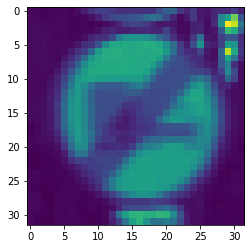

In [14]:
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE))
print(dataset.y[-1, :])

#### 훈련용 데이터 & 테스트 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
# 이전에는 데이터를 4개변수에 담았는데 지금은 2개에 인덱스를 담은 이유는
# X는 4차원. y는 2차원이니까 4개변수에 담아오면 또 차원을 일일이 맞춰줘야하니꽈

X_train = dataset.X[idx_train, :, :, :] # (29406, 32, 32, 1)
X_test =  dataset.X[idx_test, :, :, :] # (9803, 32, 32, 1)
y_train = dataset.y[idx_train, :] # (29406, 43)
y_test = dataset.y[idx_test, :] # (9803, 43)

#### 모델 훈련 & 예측_함수로 준비

In [16]:
# 전체 데이터를 원하는 크기로 나눠서 훈련할 수 있게 만드는 함수
# minibatcher(훈련데이터, 훈련정답, 나눌사이즈, 데이터의 순서를 섞느냐 마느냐):
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    # → 예외처리 / 단위테스트 / 디버깅(개발중인)모드에서 이 조건이 맞지 않으면 에러를 띄움
    # → 실제 배포시에는 지워줘야하는 코드
    
    n_samples = X.shape[0] # X의 갯수를 받아놓고요
    
    if shuffle: # 어차피 받아온 값이 불린이니까 연산자 안썼음 ㅇㅇ
        idx = np.random.permutation(n_samples) # X갯수 받은거를 순서를 섞어서 인덱스 저장
    else:
        idx = list(range(n_samples)) # X갯수를 순서대로 인덱스 저장
    
    for k in range(int(np.ceil(n_samples/batch_size))): # 29406/10000을 반올림X, 올림으로 > range(3)
        from_idx = k * batch_size
        to_idx = (k+1) * batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :] # 작업이 안정적으로 되도록 한거라는데 어떤 부분에서 안정적으로 처리한다는 건지 못들음 ㅇㅋ;;
        # X, y데이터를 끊어서 작업해서 함수를 호출하는 순간 10000씩 끊어진다고... 머라고.... 왓.....

In [17]:
for nb in minibatcher(X_train, y_train, 10000, True):
    print(nb[0].shape, nb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


#### Fully Connected Layer
    - W, b : 고정 값
    - hypothesis, cost, train : 변동 가능
        → 그니까 두개를 따로 모듈화합니다 ㅇㅇ

In [18]:
# 가설 준비하는 함수
def fc_nn_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("fc_b",[n_units], tf.float32, tf.constant_initializer(0.0))
    # → in_tensor는 3차원(?)이니까 크기를 갖고오기 위해서 in_tensor.get_shape()[1] 요렇게
    # → n_units 요거는 걍 원래도 갯수를 가져올꺼라서 그냥 넣을거임 ㅇㅋ?
    return tf.matmul(in_tensors, W) + b

# 액티베이션 펑션 준비하는 함수
def fc_layer(is_tensors, n_units):
    return tf.nn.leaky_relu(fc_nn_activation_layer(is_tensors, n_units)) # 나중에 액티베이션 펑션을 바꾸고싶으면 리턴 부분만 바꿔주면 되니까~

#### Convolution Layer

    (convoultion layer → relu → Max Pooling → Drop Out)  이게 한 세트가 된다.  Dropdout은 주로 선택이고
    

In [31]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
                        tf.float32, tf.contrib.layers.xavier_initializer())
    # [가로, 세로, 이전데이터에서입력받을갯수, 이미지갯수]
    b = tf.get_variable("conv_b", [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME"))


def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], "SAME")

def dropout(in_tensors, keep_prob, is_training):
    # is_training : True, False 값  True면 훈련중, False면 테스트 
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_prob), lambda:in_tensors)


# cond(is_trianing, True, False)  로 넘겨줄 예정이다. 
# 첫번째 lambda는 True라면 실행  True라는게 훈련중이므로 dropout을 하기 때문에 keep_prob를 넘겨준다. 
# 두번째 lambda는 False라면 실행인데 False는 테스트 이므로 
#      dropout을 실행시키지 말고 그냥 넘길것이기 때문에 in_tensors만 보냄

### summary

    위 코드들 요약

    - convolution 1 (5*5, 32개 필터) 사용
    - convolution 2 (5*5  64개 필터) 사용
    
    - FC : 출력 1024 개 unit을 사용
    - Dropout : 60%만 가지고 훈련 (40%는 버리고)
    - Activation Function : softmax
    
    
    나중에 만들 때 이렇게 스펙을 정리해놔야 설명하기 좋다.
    
    

In [36]:
# 위에서 만든 코드들을 네트워크 구성


def model(in_tensors, is_training) : 
    # ----1st conv layer : 5*5, 32 filter, 2x maxpool, 20% drop out
    with tf.variable_scope("L1") :
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # ---- 2nd conv layer : 5*5, 64 filter, 2x maxpool, 20% drop out
    with tf.variable_scope("L2") :
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)

    # 평면화     
    with tf.variable_scope("flatten") :
        l2_out_flat = tf.layers.flatten(l2_out)
    
    # FC : 1024 neurons, 40% drop dout
    with tf.variable_scope("L3") :
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
    
    # output (출력계층)    
    with tf.variable_scope("out") :
        out_tensors = fc_nn_activation_layer(l3_out, N_CLASS)
        
    return out_tensors
# ↓↓↓↓↓↓↓↓ 설명 ↓↓↓↓↓↓↓↓

#### [L1]
    
    with tf.variable_scope("L1") :            
            tf.variable_scope : L1이라는 이름으로 그룹화 하는 것이다. 
    
        l1 = maxpool(conv_layer(in_tensors, 5, 32), 2)
            
            conv_layer : 우리가 만든 함수는 필터 크기가 [k, k]로 만들었으니까 한 값만 넘겨주면 된다.
            maxpool : 위의 conv_layer의 결과값과 필터값을 매개변수로 한다. 
        
        l1_out = dropout(l1, 0.8, is_training)
            
            우리가 만든 dropout 함수를 사용한다. 
            dropout : 매개변수는 maxpool한 값, 버릴 비율, is_training은 True False 여부
            
            
    ----------------------------------------------------------
    
#### [L2]
    
    l2 방식도 변수만 달라지지 l1과 같은 방식이다. 
    
    l2 = maxpool(conv_layer(l1_out, 5, 64), 2)
                            ------
        중요한 것은 conv_layer 부분에서 in_tensors를 받아오는게 아니라 
        위에서 바꿔놓은 l1_out을 가져와야 한다는 점이다.



    -----------------------------------------------------------------------------------------------

    여기까지가 전처리작업이다 
    
    4차원으로 작업했기 때문에  2차원으로 다시 변경해줘야 FC로 넘겨줄 수 있다. 
    
    4차원 -> 2차원으로 하는 작업이 평면화라고 한다. 
    

#### [평면화]

    l2_out_flat = tf.layers.flatten(l2_out)
        l2의 결과(4차원)를 flatten 함수에 넣어주기만 하면 평면화가 된다. 


#### [L3]

    l3 = fc_layer(l2_out_flat, 1024)
    l3_out = dropout(l3, 0.6, is_training)
          
          
          1024인 이유는 
          40%만 사용할 것이기 때문에 0.6을 버린다. 
      

#### [최종 output]

    out_tensors = fc_nn_activation_layer(l3_out, N_CLASS)  
        사용하기 직전의 뭐, 몇개 출력
        
        그전까진 1024개로 이어왔는데 실제 출력의 갯수를 넘겨 받아야 하기 때문에 
        43개를 넘겨 받아야한다.
        
        위에 상수로 만든 N_CLASSES를 사용한다. 
            
    

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# 우리가 실제로 사용할 함수
def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASS))
    is_training = tf.placeholder(tf.bool)
    
    logit = model(in_X_tensors_batch, is_training)
    out_y_pred =  tf.nn.softmax(logit)
    
    # cost
    loss_score = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(max_epochs) :
        print("Epoch : ",epochs)
        tf_score = []
        
        for mb in minibatcher(X_train, y_train, batch_size, True) : 
            tf_output = sess.run([train, loss], feed_dict={in_X_tensors_batch:mb[0], 
                                                         in_y_tensors_batch:mb[1],
                                                        is_training:True})
            
            
            tf_score.append(tf_output[1])
            
        print("training_loss_score : ", np.mean(tf_score))
        
    #TEST
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss = sess.run([out_y_pred, loss], feed_dict={in_X_tensors_batch:X_test, 
                                                         in_y_tensors_batch:y_test,
                                                        is_training:False})
    
    print("test_loss_score : ", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis = 1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis = 1).astype(np.int32)
    
    print(classification_report(y_test_true_classified, y_test_pred_classified))
    

    train_model(X_train, y_train, X_test, y_test, 0.001,)
    
        매개변수 : 
        훈련용 데이터, 테스트 데이터, learning_rate, 전체 epoch(반복횟수), 배치사이즈
        
        
        - in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
            
            X값이 될 것  (미리 지정할 수 없으니 placeholder)                        
            shape
                4차원이 될 것이기 때문에 shape이 4차원이 되어야 한다.
                크기가 그런데 32*32쓰는건 상수로 만들어놨으니 RESIZED_IMAGE를 쓴다.
                정사각형이면 RESIZED_IMAGE를 써도 되는데 이미지가 직사각형일 수도 있으니
                배열 [0][1]번을 써준다. 
            
            
        - in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASS))
        
            y값이 될 것 (미리 지정할 수 없어서 placeholder)
            
            shape
                출력이 43개이므로 미리 만들어둔 상수값으로 써준다. 
            
        - is_training = tf.placeholder(tf.bool)
            training 여부 (이것도 미리 지정 아님)
            bool값이 들어가므로 tf.bool을 이용한다. 
            
        - logit = model(in_X_tensors_batch, is_training)
            우리가 만든 model함수 사용
            X값, training 여부를 넘겨준다. 
        
        - out_y_pred =  tf.nn.softmax(logit)
        
        - loss_score = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=in_y_tensors_batch)
        
            v2가 권장사항이다. 
            평소에 cost라는 변수명으로 썼던 그것이다. 
            
        - loss = tf.reduce_mean(loss_score)
            loss_score에서 바로 평균내도 됐지만 너무 길어져서 따로 만듬
        
        
        - train = tf.train.AdamOptimizer(learning_rate).minimize(loss)
        
        
        
        - for mb in minibatcher(X_train, y_train, batch_size, True) : 
            tf_output = sess.run([train, loss], feed_dict={in_X_tensors_batch:mb[0], 
                                                         in_y_tensors_batch:mb[1],
                                                         is_training:True})
            
                in_X_tensors_batch[0] : 첫번째 값을 가져와야한다.
                
                is_training : 현재 훈련중이니까 True로 넘겨준다. 
        
        
            tf_score.append(tf_output[1])  
                1번째가 cost이다. 평균을 내기위해 한 list로 모아둔다.
        
        
       

In [39]:
tf.reset_default_graph()
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)  #실제 코드 실행

Epoch :  0
training_loss_score :  3.90862
Epoch :  1
training_loss_score :  0.6258551
Epoch :  2
training_loss_score :  0.31595212
Epoch :  3
training_loss_score :  0.20409803
Epoch :  4
training_loss_score :  0.15152648
Epoch :  5
training_loss_score :  0.11584053
Epoch :  6
training_loss_score :  0.09897056
Epoch :  7
training_loss_score :  0.07745737
Epoch :  8
training_loss_score :  0.07683411
Epoch :  9
training_loss_score :  0.06729703
TEST SET PERFORMANCE
test_loss_score :  0.05541778
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        67
           1       0.94      0.99      0.97       539
           2       0.98      0.99      0.99       558
           3       0.98      0.98      0.98       364
           4       1.00      0.99      0.99       487
           5       0.98      0.97      0.98       479
           6       1.00      0.97      0.99       105
           7       0.99      0.99      0.99       364
           8    

In [41]:
# cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

# plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
# plt.colorbar()
# plt.tight_layout()

# netsong7 [11:40]
# plt.imshow(np.log2(cm+1), interpolation="nearest", cmap=plt.get_cmap("tab20"))
# plt.colorbar()
# plt.tight_layout()